<a href="https://colab.research.google.com/github/Helm110/ASTRON-1221/blob/main/Hubble's_Constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

#Import the libraries and data for the graphs
import astropy.io.ascii
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [ ]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


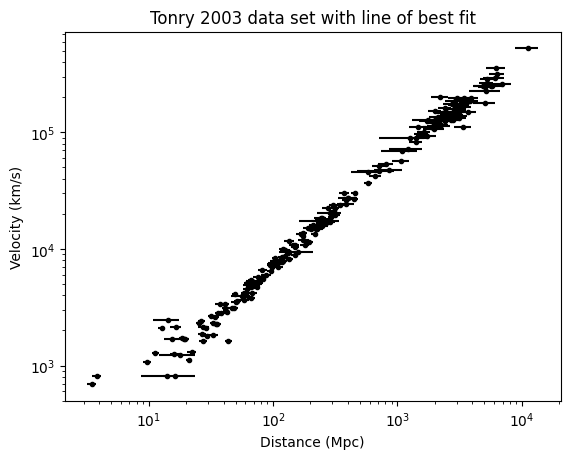

In [ ]:
#Creating graphic of the given data, Axis will be on a log scale
distance = 10**dat["col8"] / 72 * u.mpc
velocity = 10**dat["col7"] * u.km/u.s
disErr = (10**(dat["col8"]+dat["col9"]) - 10**(dat["col8"])) / 72 * u.mpc
plt.plot(distance.to(u.mpc).value, velocity.to(u.km/u.s).value, marker = ".", color = "black", linestyle = "None")
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km/u.s).value, xerr = disErr.to(u.mpc).value, color = "black", linestyle = "None")
#Make the graph pretty
plt.title("Tonry 2003 Data set with Line of best fit")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.xscale("log")
plt.yscale("log")


Text(0.5, 1.0, 'Tonry 2003 Data set with Selected Range')

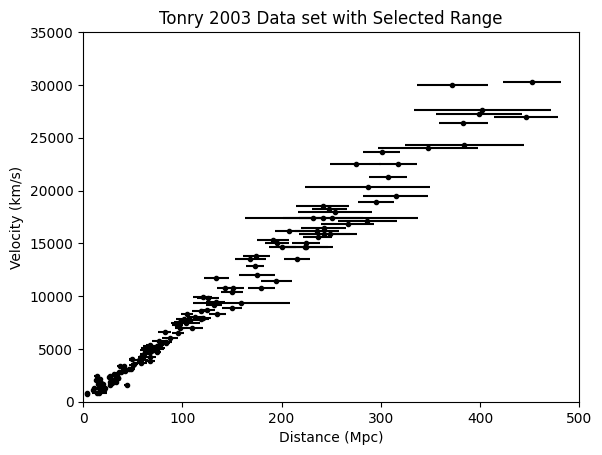

In [ ]:
#Selected part of data with reasonable error margins
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km/u.s).value, xerr = disErr.to(u.mpc).value, marker = ".", color = "black", linestyle = "None")
#Slected range with natural break in data
plt.xlim(0,500)
plt.ylim(0,3.5e4)
#Make the graph pretty
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Tonry 2003 Data set with Selected Range")

In [ ]:
#Defining and Calculating the line of best fit
#Defining Variables for line of best fit
xaxis = distance.to(u.mpc).value
ind = np.where((xaxis>=0) & (xaxis<=500))
xaxis = xaxis[ind]
yaxis = velocity.to(u.km/u.s).value
#Defining the functions to calculate line of bets fit
fit = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km/u.s).value[ind], 1)
linFit = np.poly1d(fit)
linFitLine = linFit(distance.to(u.mpc).value)

#Printing out to understand what [ind] does
print(distance.to(u.mpc).value[ind])
print(distance.to(u.mpc).value)

[  3.4807073   19.17200368  16.58316812  15.36977478   3.82531764
   9.69767228  22.21608373 131.72478657 175.25382425 134.17373319
 195.73455534  34.64714899 266.48176954  12.69601724 120.41137163
  58.7039742   16.09412995  18.47853358  26.83289329 174.44860607
  37.55497728 120.68894851 317.44427825 101.54709493  60.07136542
 452.55097361 248.12327429  83.11272154 150.89244772 215.60930694
 231.56211285 172.84925163  77.20892462 301.07001456 383.41359114
 294.89506417 307.37426522  97.20027722 236.41090394 223.18628514
  67.09150028 224.73333856 119.03303406 446.34174148 191.2790929
  13.98516207  94.98772879 125.21821356  68.49636166 143.43908413
  19.57345553  27.39476022  32.78441991  50.31152756 243.03426231
 200.75552371 286.85835497  82.16133808  29.55748675  61.7543427
 135.41522746 103.19710249  25.62521416  33.85848359 372.10671178
  17.85120361 315.25900721 241.36122622  27.58465163 149.85371142
  62.46942429  63.92452411 250.41913067  58.43425394  74.5877495
  36.19657708

Text(35, 29000, "Hubble's Constant = 67.60 km/s/Mpc")

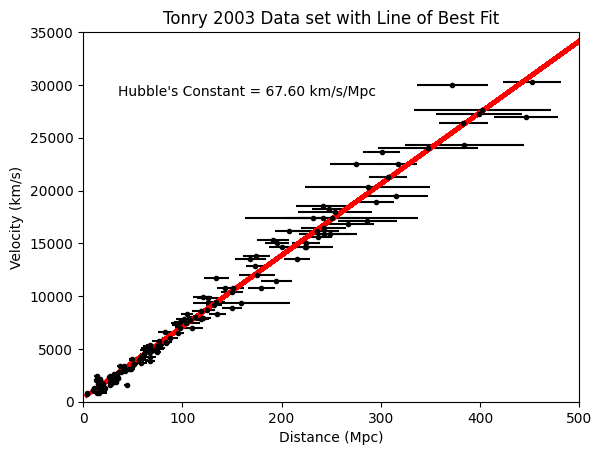

In [ ]:
#Plotting final graph with error bars and line of best fit
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km/u.s).value, xerr = disErr.to(u.mpc).value, marker = ".", color = "black", linestyle = "None")
plt.plot(distance.to(u.mpc).value, linFitLine, color = "red", linewidth = 3)
plt.xlim(0,500)
plt.ylim(0,3.5e4)
#Creat labels to read the graph easier
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Tonry 2003 Data set with Line of Best Fit")
plt.annotate(r"Hubble's Constant = {0:5.2f} km/s/Mpc".format(fit[0]), xy = (35,29000))

In [ ]:
#Calculating the Age of the Universe
"""
vt = d
t = d/v
v = Ho*d
t = d/Ho*d -> 1/Ho
"""
hubble_constant = fit[0]*u.km/u.s/u.Mpc
# Convert Mpc to km using astropy.units
hubble_constant_per_km = hubble_constant / u.Mpc.to(u.km)
# The units are now km/s/km, which simplifies to 1/s
hubble_constant_simple = hubble_constant_per_km.to(1/u.s)
t = 1/hubble_constant_simple
#Print Result in seconds
print(t)
#Change time to Giga Years
t = (t).to(u.Gyr)
print(t)

1.4084466152277006e+37 s
4.463098002470722e+20 Gyr
